
# LSTM for sequence classification in the IMDB dataset

In [55]:
from keras.models import Sequential
import numpy
import pandas as pd
from keras.datasets import imdb
from sklearn import model_selection
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import scipy
# fix random seed for reproducibility
numpy.random.seed(7)


# Load Data

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Mtech 2022/IMDB Dataset_Updated.csv", header=0)
df.head()
X = df['review']
y = df['sentiment']


In [57]:
# from google.colab import drive
# drive.mount('/content/drive')

* convert target variable into binary format

In [58]:
def function(x):
    if x=='positive':
        return 1
    else:
        return 0

y= y.apply(function)
print(y[:5])

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64


# Text to vectorizer

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix


In [60]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [61]:
X_train.head(5)

21626    Portrays the day to day stark reality of survi...
4521     This was an interesting study in societal sexu...
3652     Prior to Airport 79' these movies were rather ...
22212    This is without doubt the most exciting and sa...
17669    Maybe I'm alone here, but this is a crap show....
Name: review, dtype: object

In [62]:
def create_document_term_matrix(message_list, vectorizer):
    # doc_term_matrix = vectorizer.fit_transform(message_list)
    helper = vectorizer.fit(message_list)
    # return pd.DataFrame(doc_term_matrix.toarray(), columns=vectorizer.get_feature_names_out()), helper
    return helper

top_words = 5000
count_vect = CountVectorizer(max_features=top_words)
helper = create_document_term_matrix(X_train, count_vect)


In [63]:
X_train.head(5)

21626    Portrays the day to day stark reality of survi...
4521     This was an interesting study in societal sexu...
3652     Prior to Airport 79' these movies were rather ...
22212    This is without doubt the most exciting and sa...
17669    Maybe I'm alone here, but this is a crap show....
Name: review, dtype: object

In [64]:
X_train.shape[0]


25000

In [65]:
print(helper.transform([X_train.iloc[0]]).nonzero()[1])
print(helper.transform([X_train.iloc[1]]).nonzero()[1])
print(helper.transform([X_train.iloc[2]]).nonzero()[1])


[ 102  108  244  289  478  550  648 1158 1337 1558 1707 2285 2463 2627
 2758 2947 3067 3100 3111 3128 3132 3171 3363 3421 3553 3563 3566 3567
 3828 3963 4167 4334 4437 4449 4452 4463 4514 4862 4990]
[  70  102  191  228  230  302  315  333  364  506  563  642  671  719
  767  806  911 1045 1059 1144 1186 1268 1344 1492 1568 1645 1812 1870
 1880 1909 1962 1990 2034 2076 2085 2090 2119 2142 2149 2236 2251 2285
 2351 2385 2391 2491 2512 2569 2582 2620 2716 2746 2770 2914 2947 2975
 3025 3067 3099 3111 3127 3144 3172 3174 3215 3252 3320 3577 3700 3815
 3855 3922 3923 3938 3963 4125 4243 4257 4275 4435 4437 4463 4468 4514
 4519 4606 4737 4754 4787 4815 4854 4866 4870 4875 4876 4890 4917 4957
 4975 4976 4990 4991]
[  24   61   70  102  107  169  172  191  198  204  228  230  289  315
  333  384  441  456  470  479  502  642  712  719  938 1031 1118 1176
 1194 1243 1268 1292 1337 1340 1344 1443 1453 1544 1635 1654 1677 1719
 1749 1812 1846 1870 1878 1926 1952 1962 2034 2076 2090 2102 2113 215

In [66]:
print(helper.transform([X_train.iloc[0]]).nonzero()[1])


[ 102  108  244  289  478  550  648 1158 1337 1558 1707 2285 2463 2627
 2758 2947 3067 3100 3111 3128 3132 3171 3363 3421 3553 3563 3566 3567
 3828 3963 4167 4334 4437 4449 4452 4463 4514 4862 4990]


In [67]:
def function(x, temp):
    temp.append(helper.transform(x).nonzero()[1])


X_train_Vect = []
X_test_Vect = []
for i in range(X_train.shape[0]):
    function([X_train.iloc[i]], X_train_Vect)
for i in range(X_test.shape[0]):
    function([X_test.iloc[i]], X_test_Vect)


In [68]:
print(len(X_train_Vect))
print(type(X_train_Vect))
# X_train_Vect
X_train_Vect[0:2]


25000
<class 'list'>


[array([ 102,  108,  244,  289,  478,  550,  648, 1158, 1337, 1558, 1707,
        2285, 2463, 2627, 2758, 2947, 3067, 3100, 3111, 3128, 3132, 3171,
        3363, 3421, 3553, 3563, 3566, 3567, 3828, 3963, 4167, 4334, 4437,
        4449, 4452, 4463, 4514, 4862, 4990], dtype=int32),
 array([  70,  102,  191,  228,  230,  302,  315,  333,  364,  506,  563,
         642,  671,  719,  767,  806,  911, 1045, 1059, 1144, 1186, 1268,
        1344, 1492, 1568, 1645, 1812, 1870, 1880, 1909, 1962, 1990, 2034,
        2076, 2085, 2090, 2119, 2142, 2149, 2236, 2251, 2285, 2351, 2385,
        2391, 2491, 2512, 2569, 2582, 2620, 2716, 2746, 2770, 2914, 2947,
        2975, 3025, 3067, 3099, 3111, 3127, 3144, 3172, 3174, 3215, 3252,
        3320, 3577, 3700, 3815, 3855, 3922, 3923, 3938, 3963, 4125, 4243,
        4257, 4275, 4435, 4437, 4463, 4468, 4514, 4519, 4606, 4737, 4754,
        4787, 4815, 4854, 4866, 4870, 4875, 4876, 4890, 4917, 4957, 4975,
        4976, 4990, 4991], dtype=int32)]

x = [[1, 2], [1, 2, 3], [1]]
y = numpy.array([numpy.array(xi) for xi in x], dtype=object)
print(y)

In [69]:
# X_train_Vect = numpy.array(X_train_Vect, ndmin = 2)
# X_test_Vect = numpy.array(X_test_Vect, ndmin = 2)
X_train_Vect = numpy.array([numpy.array(xi) for xi in X_train_Vect])
X_test_Vect = numpy.array([numpy.array(xi) for xi in X_test_Vect])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [70]:
X_train_Vect[:5]


array([array([ 102,  108,  244,  289,  478,  550,  648, 1158, 1337, 1558, 1707,
              2285, 2463, 2627, 2758, 2947, 3067, 3100, 3111, 3128, 3132, 3171,
              3363, 3421, 3553, 3563, 3566, 3567, 3828, 3963, 4167, 4334, 4437,
              4449, 4452, 4463, 4514, 4862, 4990], dtype=int32)                ,
       array([  70,  102,  191,  228,  230,  302,  315,  333,  364,  506,  563,
               642,  671,  719,  767,  806,  911, 1045, 1059, 1144, 1186, 1268,
              1344, 1492, 1568, 1645, 1812, 1870, 1880, 1909, 1962, 1990, 2034,
              2076, 2085, 2090, 2119, 2142, 2149, 2236, 2251, 2285, 2351, 2385,
              2391, 2491, 2512, 2569, 2582, 2620, 2716, 2746, 2770, 2914, 2947,
              2975, 3025, 3067, 3099, 3111, 3127, 3144, 3172, 3174, 3215, 3252,
              3320, 3577, 3700, 3815, 3855, 3922, 3923, 3938, 3963, 4125, 4243,
              4257, 4275, 4435, 4437, 4463, 4468, 4514, 4519, 4606, 4737, 4754,
              4787, 4815, 4854, 4866, 4

# Read Pickle File

In [71]:
# import pickle
# def load_model():
#     with open('data_IMDB_pickle.pkl', 'rb') as file:
#         data = pickle.load(file)
#     return data


# data = load_model()
# X_train = data['X_train']
# y_train = data['y_train']
# X_test = data['X_test']
# y_test = data['y_test']


In [72]:
# X_train = list(X_train)
print(X_train_Vect[0])
print(len(X_train_Vect[0]))
print(type(X_train_Vect))


[ 102  108  244  289  478  550  648 1158 1337 1558 1707 2285 2463 2627
 2758 2947 3067 3100 3111 3128 3132 3171 3363 3421 3553 3563 3566 3567
 3828 3963 4167 4334 4437 4449 4452 4463 4514 4862 4990]
39
<class 'numpy.ndarray'>


In [73]:
# y_train = list(y_train)
print(y_train[:10])
print(type(y_train))


21626    1
4521     1
3652     0
22212    1
17669    0
35681    0
38147    0
2741     1
27522    1
46900    1
Name: sentiment, dtype: int64
<class 'pandas.core.series.Series'>


In [74]:
print(len(X_train_Vect))
print(len(y_train)) 
print(len(X_test)) 
print(len(y_test)) 


25000
25000
25000
25000


In [75]:
X_train_Vect

array([array([ 102,  108,  244,  289,  478,  550,  648, 1158, 1337, 1558, 1707,
              2285, 2463, 2627, 2758, 2947, 3067, 3100, 3111, 3128, 3132, 3171,
              3363, 3421, 3553, 3563, 3566, 3567, 3828, 3963, 4167, 4334, 4437,
              4449, 4452, 4463, 4514, 4862, 4990], dtype=int32)                ,
       array([  70,  102,  191,  228,  230,  302,  315,  333,  364,  506,  563,
               642,  671,  719,  767,  806,  911, 1045, 1059, 1144, 1186, 1268,
              1344, 1492, 1568, 1645, 1812, 1870, 1880, 1909, 1962, 1990, 2034,
              2076, 2085, 2090, 2119, 2142, 2149, 2236, 2251, 2285, 2351, 2385,
              2391, 2491, 2512, 2569, 2582, 2620, 2716, 2746, 2770, 2914, 2947,
              2975, 3025, 3067, 3099, 3111, 3127, 3144, 3172, 3174, 3215, 3252,
              3320, 3577, 3700, 3815, 3855, 3922, 3923, 3938, 3963, 4125, 4243,
              4257, 4275, 4435, 4437, 4463, 4468, 4514, 4519, 4606, 4737, 4754,
              4787, 4815, 4854, 4866, 4

In [76]:
print(type(X_train_Vect))
print(type(y_train))
print(type(X_test))
print(type(y_test))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [77]:
print(type(X_train_Vect))

y_train = numpy.array(y_train)
# y_train = list(y_train)
print(type(y_train))

print(type(X_test_Vect))

y_test = numpy.array(y_test)
# y_test = list(y_test)
print(type(y_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [78]:
# max(numpy.max(X_test_Vect))

# Truncate and/or pad input sequences

In [79]:
# truncate and/or pad input sequences
max_review_length = 600
X_train_Vect = sequence.pad_sequences(X_train_Vect, maxlen=max_review_length)
X_test_Vect = sequence.pad_sequences(X_test_Vect, maxlen=max_review_length)

print(X_train_Vect.shape)


(25000, 600)


# Create the model

In [80]:
Sequential()


In [81]:
# from keras import metrics
# model.compile(loss='mse', optimizer='adam', metrics=[
#               metrics.mean_squared_error, metrics.mean_absolute_error, metrics.mean_absolute_percentage_error, metrics.cosine_proximity])


In [82]:

top_words = 5000
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 600, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


# Final evaluation of the model

In [83]:
history = model.fit(X_train_Vect, y_train, epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test_Vect, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/10
391/391 [==============================] - 14s 32ms/step - loss: 0.4486 - accuracy: 0.7818
Epoch 2/10
391/391 [==============================] - 12s 30ms/step - loss: 0.2887 - accuracy: 0.8836
Epoch 3/10
391/391 [==============================] - 11s 29ms/step - loss: 0.2376 - accuracy: 0.9105
Epoch 4/10
391/391 [==============================] - 11s 29ms/step - loss: 0.2095 - accuracy: 0.9232
Epoch 5/10
391/391 [==============================] - 11s 29ms/step - loss: 0.1932 - accuracy: 0.9293
Epoch 6/10
391/391 [==============================] - 11s 29ms/step - loss: 0.1758 - accuracy: 0.9388
Epoch 7/10
391/391 [==============================] - 11s 29ms/step - loss: 0.1577 - accuracy: 0.9452
Epoch 8/10
391/391 [==============================] - 11s 29ms/step - loss: 0.1344 - accuracy: 0.9554
Epoch 9/10
391/391 [==============================] - 11s 29ms/step - loss: 0.1283 - accuracy: 0.9586
Epoch 10/10
391/391 [==============================] - 12s 32ms/step - loss: 0.117

In [84]:
model 

In [85]:
sample = ["This was  movie. worst"]
# sample = ["""
#          If you keep rigid historical perspective out of it, this film is actually quite entertaining. It's got action, adventure and romance, and one of the premiere casting match-ups of the era with Errol Flynn and Olivia de Havilland in the lead roles. As evident on this board, the picture doesn't pass muster with purists who look for one hundred percent accuracy in their story telling. To get beyond that, one need only put aside the history book, and enjoy the story as if it were a work of fiction. I know, I know, that's hard to do when you consider Custer's Last Stand at the Little Big Horn and it's prominence in the history of post Civil War America. So I guess there's an unresolved quandary with the picture, no matter how you look at it.<br /><br />There's a lot to take in here though for the picture's two hour plus run time. Custer's arrival at West Point is probably the first head scratcher, riding up as he does in full military regalia. The practical joke by Sharp (Arthur Kennedy) putting him up in the Major's headquarters probably should have gotten them both in trouble.<br /><br />Ironically, a lot of scenes in this military film play for comedy, as in Custer's first meeting with Libby Bacon, and subsequent encounters that include tea reader Callie (Hattie McDaniel). I hadn't noticed it before in other films, but McDaniel reminded me an awful lot of another favorite character actor of mine from the Forties, Mantan Moreland. So much so that in one scene it looked like it might have been Moreland hamming it up in a dress. With that in mind, the owl scene was a hoot too.<br /><br />As for Flynn, it's interesting to note that a year earlier, he portrayed J.E.B. Stuart opposite Ronald Reagan's depiction of General Custer in "Santa Fe Trail", both vying for the attention of none other than Olivia de Havilland. In that film, Reagan put none of the arrogance and flamboyance into the character of Custer that history remembers, while in Flynn's portrayal here it's more than evident. But it doesn't come close to that of Richard Mulligan's take on the military hero in 1970's "Little Big Man". Let's just say that one was a bit over the top.<br /><br />The better take away the picture had for me was the manner in which Custer persevered to maintain his good name and not gamble it away on a risky business venture. That and his loyalty to the men he led in battle along with the discipline he developed over the course of the story. Most poignant was that final confrontation with arch rival Sharp just before riding into the Little Big Horn, in which he declared that hell or glory was entirely dependent on one's point of view. Earlier, a similar remark might have given us the best insight of all into Custer's character, when he stated - "You take glory with you when it's your time to go".
# """]
sample = helper.transform(sample).nonzero()[1]
sample = sequence.pad_sequences([sample], maxlen=max_review_length)
val = model.predict(sample)
print(val[0][0])
if(val>=0.5):
    print("positive")
else:
    print("negative")


0.017955057
negative


In [86]:
import pickle
data_IMDB = {"helper": helper, "model": model}
with open('/data_IMDB_pickle_CountVectorizer.pkl', 'wb') as file:
    pickle.dump(data_IMDB, file)


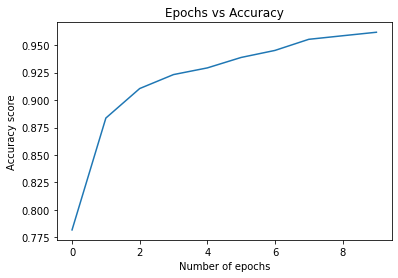

In [87]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title("Epochs vs Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy score")
plt.show()
